In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rfm=pd.read_csv("/content/RFM data.csv")
rfm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
85534,547563,23002,travel card wallet skulls,24,2011-03-24 08:56:00,0.42,15651.0,United Kingdom,10.08
85535,547563,22710,wrap i love london,25,2011-03-24 08:56:00,0.42,15651.0,United Kingdom,10.50
85536,547563,22711,wrap circus parade,25,2011-03-24 08:56:00,0.42,15651.0,United Kingdom,10.50
85537,547563,22570,feltcraft cushion rabbit,4,2011-03-24 08:56:00,3.75,15651.0,United Kingdom,15.00


In [ ]:
rfm.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,85539.000000,85539.000000,85539.000000,85539.000000,85538.000000
mean,542091.987690,10.220180,2.931731,15318.288348,18.933127
std,3293.044366,16.558932,2.758471,1733.595918,34.199842
min,536365.000000,1.000000,0.120000,12347.000000,0.140000
25%,539088.000000,2.000000,1.250000,13948.000000,5.000000
50%,542231.000000,5.000000,1.950000,15271.000000,11.900000
75%,544945.000000,12.000000,3.750000,16904.000000,19.500000
max,547563.000000,147.000000,19.950000,18283.000000,1914.240000


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85539 entries, 0 to 85538
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    85539 non-null  int64  
 1   StockCode    85539 non-null  object 
 2   Description  85539 non-null  object 
 3   Quantity     85539 non-null  int64  
 4   InvoiceDate  85539 non-null  object 
 5   UnitPrice    85539 non-null  float64
 6   CustomerID   85539 non-null  float64
 7   Country      85539 non-null  object 
 8   TotalPrice   85538 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 5.9+ MB


In [ ]:
rfm.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     1
dtype: int64

In [ ]:
current_date = pd.to_datetime(rfm["InvoiceDate"]).max()
recency_data = rfm.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency_data["Recency"] = (current_date - pd.to_datetime(recency_data["InvoiceDate"])).dt.days # Convert to datetime objects before subtraction and extract the number of days
recency_data = recency_data[["CustomerID", "Recency"]]
print(recency_data)

      CustomerID  Recency
0        12347.0       56
1        12348.0       57
2        12350.0       49
3        12352.0        1
4        12356.0       64
...          ...      ...
2000     18260.0        8
2001     18269.0      105
2002     18270.0        5
2003     18280.0       16
2004     18283.0       23

[2005 rows x 2 columns]


In [ ]:
frequency_data = rfm.groupby("CustomerID")["InvoiceDate"].nunique().reset_index()
frequency_data.columns = ["CustomerID", "Frequency"]
print(frequency_data)

      CustomerID  Frequency
0        12347.0          2
1        12348.0          2
2        12350.0          1
3        12352.0          4
4        12356.0          1
...          ...        ...
2000     18260.0          3
2001     18269.0          1
2002     18270.0          1
2003     18280.0          1
2004     18283.0          3

[2005 rows x 2 columns]


In [ ]:
rfm["Totalprice"] = rfm["Quantity"] * rfm["UnitPrice"]
monetary_data = rfm.groupby("CustomerID")["Totalprice"].sum().reset_index()
monetary_data.columns = ["CustomerID", "Monetary"]
print(monetary_data)

      CustomerID  Monetary
0        12347.0   1187.18
1        12348.0    840.24
2        12350.0    294.40
3        12352.0    641.51
4        12356.0   1947.62
...          ...       ...
2000     18260.0   1336.52
2001     18269.0    168.60
2002     18270.0    111.95
2003     18280.0    180.60
2004     18283.0    317.90

[2005 rows x 2 columns]


In [ ]:
rfm_data = recency_data.merge(frequency_data, on="CustomerID")
rfm_data = rfm_data.merge(monetary_data, on="CustomerID")
rfm_data

,CustomerID,Recency,Frequency,Monetary
0,12347.0,56,2,1187.18
1,12348.0,57,2,840.24
2,12350.0,49,1,294.40
3,12352.0,1,4,641.51
4,12356.0,64,1,1947.62
...,...,...,...,...
2000,18260.0,8,3,1336.52
2001,18269.0,105,1,168.60
2002,18270.0,5,1,111.95
2003,18280.0,16,1,180.60


In [ ]:
recency_data["Recency_Numeric"] = recency_data["Recency"]

rfm_data = rfm_data.merge(recency_data[["CustomerID", "Recency_Numeric"]], on="CustomerID")


rfm_data['R_rank']=rfm_data['Recency_Numeric'].rank(ascending=False)
rfm_data['F_rank']=rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank']=rfm_data['Monetary'].rank(ascending=True)


rfm_data['R_rank_norm']=(rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm']=(rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm']=(rfm_data['M_rank']/rfm_data['M_rank'].max())*100

rfm_data.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Numeric,R_rank_norm,F_rank_norm,M_rank_norm
0,12347.0,56,2,1187.18,56,33.358605,69.226933,85.137157
1,12348.0,57,2,840.24,57,32.170836,69.226933,76.259352
2,12350.0,49,1,294.40,49,40.055598,30.349127,36.209476
3,12352.0,1,4,641.51,1,97.624463,89.750623,68.079800
4,12356.0,64,1,1947.62,64,27.748294,30.349127,92.768080


In [ ]:
rfm_data["RFM_Score"]=0.15*rfm_data["R_rank_norm"]+0.28*rfm_data["F_rank_norm"]+0.57*rfm_data["M_rank_norm"]
rfm_data = rfm_data.round(2)
rfm_data

,CustomerID,Recency,Frequency,Monetary,Recency_Numeric,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12347.0,56,2,1187.18,56,33.36,69.23,85.14,72.92
1,12348.0,57,2,840.24,57,32.17,69.23,76.26,67.68
2,12350.0,49,1,294.40,49,40.06,30.35,36.21,35.15
3,12352.0,1,4,641.51,1,97.62,89.75,68.08,78.58
4,12356.0,64,1,1947.62,64,27.75,30.35,92.77,65.54
...,...,...,...,...,...,...,...,...,...
2000,18260.0,8,3,1336.52,8,84.41,82.69,87.58,85.74
2001,18269.0,105,1,168.60,105,8.77,30.35,18.70,20.47
2002,18270.0,5,1,111.95,5,90.45,30.35,7.68,26.44
2003,18280.0,16,1,180.60,16,73.26,30.35,20.55,31.20


In [ ]:
rfm_data["Customer_segment"] = np.where(rfm_data["RFM_Score"] > 85, "1: 0-30 days",
                                np.where(rfm_data["RFM_Score"] > 75, "2: 31-60 days",
                                np.where(rfm_data["RFM_Score"] > 55, "3: 61-90 days",
                                np.where(rfm_data["RFM_Score"] > 30, "4: 91-180 days",
                                                                      "5: 181-365 days"))))
rfm_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12347.0,72.92,3: 61-90 days
1,12348.0,67.68,3: 61-90 days
2,12350.0,35.15,4: 91-180 days
3,12352.0,78.58,2: 31-60 days
4,12356.0,65.54,3: 61-90 days
5,12359.0,77.40,2: 31-60 days
6,12361.0,28.93,5: 181-365 days
7,12362.0,48.05,4: 91-180 days
8,12365.0,41.18,4: 91-180 days
9,12370.0,89.31,1: 0-30 days


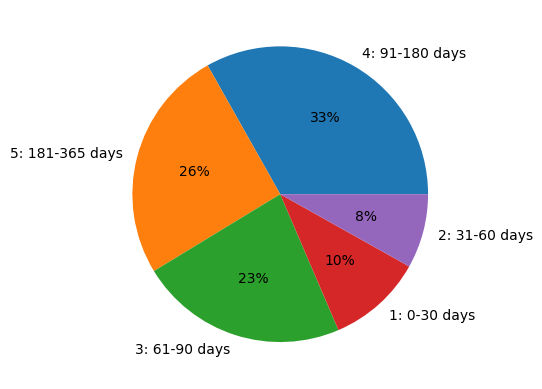

In [ ]:
rfm_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)
plt.pie(rfm_data.Customer_segment.value_counts(),labels=rfm_data.Customer_segment.value_counts().index,autopct="%.0f%%")
plt.show()

In [ ]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,Recency_Numeric,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12347.0,56,2,1187.18,56,33.36,69.23,85.14,72.92,3: 61-90 days
1,12348.0,57,2,840.24,57,32.17,69.23,76.26,67.68,3: 61-90 days
2,12350.0,49,1,294.40,49,40.06,30.35,36.21,35.15,4: 91-180 days
3,12352.0,1,4,641.51,1,97.62,89.75,68.08,78.58,2: 31-60 days
4,12356.0,64,1,1947.62,64,27.75,30.35,92.77,65.54,3: 61-90 days
...,...,...,...,...,...,...,...,...,...,...
2000,18260.0,8,3,1336.52,8,84.41,82.69,87.58,85.74,1: 0-30 days
2001,18269.0,105,1,168.60,105,8.77,30.35,18.70,20.47,5: 181-365 days
2002,18270.0,5,1,111.95,5,90.45,30.35,7.68,26.44,5: 181-365 days
2003,18280.0,16,1,180.60,16,73.26,30.35,20.55,31.20,4: 91-180 days


In [ ]:
def rfm_segment(row):

    r, f, m = row['Recency'], row['Frequency'], row['Monetary']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f >= 2 and m >= 2:
        return 'Potential Loyalist'
    elif r >= 4 and f >= 1 and m >= 1:
        return 'Recent Customers'
    elif r >= 4 and f >= 1 and m >= 1:
        return 'Promising'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Needs Attention'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'About to Sleep'
    elif r >= 2 and f <= 3 and m <= 3:
        return 'At Risk'
    elif r <= 3 and f >= 4 and m >= 4:
        return 'Can\'t Lose Them'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    else:
        return 'Unknown'

rfm_data['Segment'] = rfm_data.apply(rfm_segment, axis=1)

print(rfm_data.head())

   CustomerID  Recency  Frequency  Monetary  Recency_Numeric  R_rank_norm  \
0     12347.0       56          2   1187.18               56        33.36   
1     12348.0       57          2    840.24               57        32.17   
2     12350.0       49          1    294.40               49        40.06   
3     12352.0        1          4    641.51                1        97.62   
4     12356.0       64          1   1947.62               64        27.75   

   F_rank_norm  M_rank_norm  RFM_Score Customer_segment             Segment  
0        69.23        85.14      72.92    3: 61-90 days  Potential Loyalist  
1        69.23        76.26      67.68    3: 61-90 days  Potential Loyalist  
2        30.35        36.21      35.15   4: 91-180 days    Recent Customers  
3        89.75        68.08      78.58    2: 31-60 days     Can't Lose Them  
4        30.35        92.77      65.54    3: 61-90 days    Recent Customers  


<Axes: xlabel='Segment', ylabel='count'>

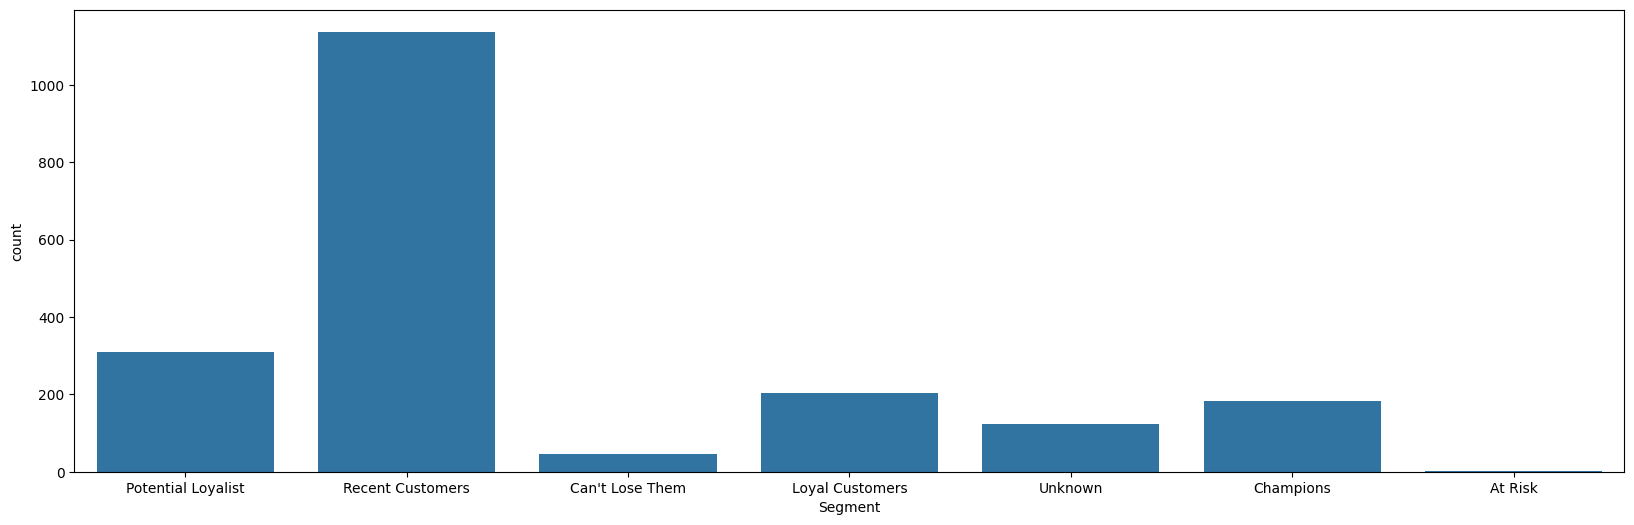

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Segment',data=rfm_data)

**Suggested business stratergy *from this rfm analysis for segment wise customers as follows,
**Champions**: Offer exclusive discounts and loyalty programs to maintain their engagement.
**Potential Loyalists**: Use targeted marketing and incentives to encourage repeat purchases.
**Can't Lose Them**: Implement re-engagement campaigns and gather feedback to win them back.
**Recent Customers**: Provide welcome offers and follow-up communications to build loyalty.
**Loyal Customers**: Show appreciation with thank-you notes and small rewards to sustain their loyalty.